#  Categorical Variable Encoding is Technique used to convert Categorical Variable into Numerical variable ,it is done because most of the algorithms except tree based algo's requires there input to be in the form of Numerical values only hence we perform Categorical  encoding .

### Techniques Explained : 
#### 1 . Binary Encoding
#### 2 . Label   Encoding
#### 3 . Ordinal Encoding
#### 4 . OneHotEncoding or Dummy encoding
#### 5.  Target Encoding  or Mean Encoding or likelihood Encoding
#### 6.   KFold Target Encoding 
#### 7.   Cyclic Feature's Encoding
#### 8 .  Frequency Encoding

In [2]:
# Importing all the necessary libraries
import pandas as pd

In [5]:
# Loading the dataset
car = pd.read_csv('datasets/car-data.csv')

In [6]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [7]:
car.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [8]:
# our concern is only with Categorical variables ,so lets drop numeric columns
cat_car = car.select_dtypes(include = object)
cat_car.dtypes

make               object
fuel-type          object
aspiration         object
num-of-doors       object
body-style         object
drive-wheels       object
engine-location    object
engine-type        object
fuel-system        object
dtype: object

In [9]:
for i in cat_car.columns:
    print(i," unique values are : \n")
    print(cat_car[i].unique())
    print("________________________")

make  unique values are : 

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
________________________
fuel-type  unique values are : 

['gas' 'diesel']
________________________
aspiration  unique values are : 

['std' 'turbo']
________________________
num-of-doors  unique values are : 

['two' 'four' nan]
________________________
body-style  unique values are : 

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
________________________
drive-wheels  unique values are : 

['rwd' 'fwd' '4wd']
________________________
engine-location  unique values are : 

['front' 'rear']
________________________
engine-type  unique values are : 

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
________________________
fuel-system  unique values are : 

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
_______________________

 # Binary Encoding :

#  it is one of the encoding scheme for converting Categotical Variable in to Numerical Variable,it is self descriptive
## this technique is used when Categotical Variable has exactly two categories with in it.
for eg : gender = [male,female] ,match = [win,loss] etc 

In [10]:
# here we'll apply  Binary Encoding on fuel type column
cat_car["bin_fuel_type"] = cat_car["fuel-type"].map({'gas':1,"diesel":0}) 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
cat_car[["bin_fuel_type","fuel-type"]].sample(5)

,bin_fuel_type,fuel-type
107,1,gas
204,1,gas
190,1,gas
136,1,gas
117,1,gas


In [12]:
cat_car[["bin_fuel_type","fuel-type"]].dtypes

bin_fuel_type     int64
fuel-type        object
dtype: object

# Using Scikit learn pacakage for doing the same (Binary Encoding)

In [13]:
# Enoding make column using LabelBinarizer

from sklearn.preprocessing import LabelBinarizer

labelbinarizer = LabelBinarizer()

cat_car["make_bin_encoded_"]= labelbinarizer.fit_transform(cat_car["fuel-type"])
cat_car[["make_bin_encoded_","fuel-type"]]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,make_bin_encoded_,fuel-type
0,1,gas
1,1,gas
2,1,gas
3,1,gas
4,1,gas
...,...,...
200,1,gas
201,1,gas
202,1,gas
203,0,diesel


#  Label Encoding :

# it is one of the encoding scheme for converting Categotical Variable in to Numerical Variable,
## this technique assigns a numeric value to each of the categories of same class.
for eg ,city = [mysore,davangere,chennai] after using label encoding technique, mysore = 0 ,davangere = 1,chennai = 2 (order of assigning numeric value to a category differ's (there is no order here))

pros :
          * keeps the shape of the dataframe.
cons :
          * our training algo assume's that random order  category with more value say 
          " (chennai = 2 ) > (davangere = 1) > (mysore = 0) "  (chennai > davangere > mysore) and ends up in creating 
          dumb  model.
            (note : in reality there is no such rule that one city is greater than other just by consedering there names) 
       

In [14]:
# here we'll apply  Label Encoding on fuel-system column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_car["labeled_fuel_system"] = le.fit_transform(cat_car["fuel-system"])
cat_car[["labeled_fuel_system","fuel-system"]].sample(20)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,labeled_fuel_system,fuel-system
56,2,4bbl
174,3,idi
79,6,spdi
197,5,mpfi
112,3,idi
124,6,spdi
139,1,2bbl
52,1,2bbl
18,1,2bbl
84,6,spdi


In [15]:
cat_car[["labeled_fuel_system","fuel-system"]].dtypes

labeled_fuel_system     int32
fuel-system            object
dtype: object

# Ordinal Encoding :

# this is used when our categorical variable has Ordinal data with in it.
for eg : student performences [bad,average,best] , hotel Ratings = [1,2,3,4,5]



In [24]:
# let's create a sample dataFrame 

df = {
        "Movies" : ["John wick","Blade","kill Volume","Ninja Assassins","Blood money","Fire","NightSeeks","Arima"],
        "Ratings": [5,4,3,2,1,2,3,1]
}
df = pd.DataFrame(df)
df # Rating column is the example for ordinal data  # 5>4>3>2>1

,Movies,Ratings
0,John wick,5
1,Blade,4
2,kill Volume,3
3,Ninja Assassins,2
4,Blood money,1
5,Fire,2
6,NightSeeks,3
7,Arima,1


In [25]:
# Ordinal Data can be encoded using OrdinalEncoder

# Creating an Pandas dataframe

df = {'Employee Id' : [112, 113, 114, 115], 'Income Range' : ['Low', 'High', 'Medium', 'High']}
df = pd.DataFrame(df)
df

,Employee Id,Income Range
0,112,Low
1,113,High
2,114,Medium
3,115,High


In [26]:
from sklearn.preprocessing import OrdinalEncoder

ordinalencoder = OrdinalEncoder()

df["ordinalencoder"] = ordinalencoder.fit_transform(df[['Income Range']]).astype(int)
df[["Income Range","ordinalencoder"]]

# Note : Low = 1,High = 0 ,Medium = 2 these values not representing the order at all
# what we got : Medium > low > High
# what is in reality : High > Medium > low

,Income Range,ordinalencoder
0,Low,1
1,High,0
2,Medium,2
3,High,0


In [27]:
# We can fix the above Problem here using pd.Categorical() 

categories  = pd.Categorical(df["Income Range"],categories = ["Low","Medium","High"],ordered = True)
categories

[Low, High, Medium, High]
Categories (3, object): [Low < Medium < High]

In [28]:
# Factorizing the column data
labels,a= pd.factorize(categories,sort = True)

In [29]:
df["labels"] = labels
df[["Income Range","labels"]]
# Note : High > Medium > low 

,Income Range,labels
0,Low,0
1,High,2
2,Medium,1
3,High,2


# On Hot Encoding or Dummy encoding :

## this is the most widely used technique  for converting Categotical Variable in to Numerical Variable, this technique creates a new variable for each of the category of  the same class 
for eg if the given feature has k different categories with in it then on applying one hot encoding on this feature leads to creating in  k new feature's with 1's and 0's,
* where 1 refers presence of that particular category
*       0 refers absence  of that particular category

# Note : If the given feature has k different categories with in it then on applying one hot encoding on this feature leads to creating in  k new feature's and then we need to use only " k-1 Features " in order to avoid Dummy Trap Variable (again it is related with Multicolinearity concept)
___

In [30]:
print("DataFrame shape before applying : ",cat_car.shape)
cat_car.columns

DataFrame shape before applying :  (205, 12)


Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'fuel-system',
       'bin_fuel_type', 'make_bin_encoded_', 'labeled_fuel_system'],
      dtype='object')

In [31]:

# using_ pd.get_dummies()
c = cat_car.copy()
c = pd.get_dummies(c,drop_first= True) # drop_first= True in order to aviod dummpy trap variable
print("DataFrame shape after apply get dummies fun ",c.shape)
c

DataFrame shape after apply get dummies fun  (205, 47)


,bin_fuel_type,make_bin_encoded_,labeled_fuel_system,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,1,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
202,1,1,5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
203,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Target Encoding  or Mean Encoding or likelihood Encoding

# It is a technique  for converting Categotical Variable in to Numerical Variable , here we replace category value of same class with it's average value  which are associated with target column .

### Note : here  Relationship is only between categorical variable and Target variable . 

how  it works ?
    * Unlike regular encoding, which has no real meaning to the labels, mean encoding imposes an ordering. This allows you 
      to reduce your loss while using shorter trees.

cons : 
    * very much likely to overfit if we have  Categorical feature with disimilar category quantity .
       for eg :  gender feature has 500 male and 21 female.


In [66]:
# let's create dataframe 
# alpha is categorical column
df = pd.DataFrame({"alpha" : ['a','b','b','a','b','a','a','b','a','b'], "target" : [1,0,1,0,1,0,1,0,0,1]})
print(df.alpha.value_counts())
df

a    5
b    5
Name: alpha, dtype: int64


,alpha,target
0,a,1
1,b,0
2,b,1
3,a,0
4,b,1
5,a,0
6,a,1
7,b,0
8,a,0
9,b,1


In [67]:
df.groupby("alpha")["target"].agg('mean')

# we have 5 a's out of which 2 a's has value equal to 1 in target column hence we obtain 2/5 = 0.4
# we have 5 a's out of which 3 a's has value equal to 1 in target column hence we obtain 3/5 = 0.6

alpha
a    0.4
b    0.6
Name: target, dtype: float64

In [68]:
# we can compute above value using pivot_table func also

x = df.pivot_table(index = "alpha",values = "target",aggfunc = 'mean' )
x

,target
alpha,
a,0.4
b,0.6


In [69]:
df["target_encoding"] = 0
df["target_encoding"] = df["alpha"].map({"a":0.4,"b":0.6})
print(df.dtypes)
df[["alpha","target_encoding","target"]] 

alpha               object
target               int64
target_encoding    float64
dtype: object


,alpha,target_encoding,target
0,a,0.4,1
1,b,0.6,0
2,b,0.6,1
3,a,0.4,0
4,b,0.6,1
5,a,0.4,0
6,a,0.4,1
7,b,0.6,0
8,a,0.4,0
9,b,0.6,1


# KFold Target Encoding 

## As i said earlier using target encoding all alone result's in over fitting , in order to over come this problem  we can use 
# Regularization technique such as :
    * cross validation techniques (KFold cv and Stratified CV are Widely used )

In [14]:
import pandas as pd
df = pd.DataFrame({"alpha" : ['a','b','b','a','b','a','a','b','a','b','a','b','a','a','b'], "target" : [1,0,1,0,1,0,1,0,0,1,0,0,1,0,1]})
x = df.copy()
df.head()

,alpha,target
0,a,1
1,b,0
2,b,1
3,a,0
4,b,1


In [15]:
# let's use KFold Cross Validation
from sklearn.model_selection import KFold

In [17]:
kf = KFold(5,shuffle = True)
for train,valid in kf.split(x):
    for col in x.columns:
        if(x[col].dtype == 'object'):
            mean_val = dict(x.iloc[train][[col,"target"]].groupby(col)["target"].mean())
            print("Train set is {} and Validation set is {} and mean_value is : {}  ".format(train,valid,mean_val))
           

Train set is [ 1  2  3  4  5  6  7  9 10 11 13 14] and Validation set is [ 0  8 12] and mean_value is : {'a': 0.2, 'b': 0.5714285714285714}  
Train set is [ 0  2  3  5  6  7  8 10 11 12 13 14] and Validation set is [1 4 9] and mean_value is : {'a': 0.375, 'b': 0.5}  
Train set is [ 0  1  3  4  6  8  9 10 11 12 13 14] and Validation set is [2 5 7] and mean_value is : {'a': 0.42857142857142855, 'b': 0.6}  
Train set is [ 0  1  2  3  4  5  6  7  8  9 12 14] and Validation set is [10 11 13] and mean_value is : {'a': 0.5, 'b': 0.6666666666666666}  
Train set is [ 0  1  2  4  5  7  8  9 10 11 12 13] and Validation set is [ 3  6 14] and mean_value is : {'a': 0.3333333333333333, 'b': 0.5}  


In [19]:
x.loc[[ 0,8 ,12],"alpha"] = x.loc[[ 0 , 8, 12],"alpha"].map({'a': 0.2, 'b': 0.5714285714285714})
x.loc[[1, 4 ,9],"alpha"] = x.loc[[1 ,4 ,9],"alpha"].map({'a': 0.375, 'b': 0.5})
x.loc[[2 ,5, 7],"alpha"] = x.loc[[2 ,5, 7],"alpha"].map({'a': 0.42857142857142855, 'b': 0.6})
x.loc[[10 ,11 ,13],"alpha"] = x.loc[[10 ,11, 13],"alpha"].map({'a': 0.5, 'b': 0.6666666666666666})
x.loc[[ 3  ,6, 14],"alpha"] = x.loc[[ 3,  6, 14],"alpha"].map({'a': 0.3333333333333333, 'b': 0.5} )

In [23]:
x["actual_alpha"] =df["alpha"]

In [25]:
x[["actual_alpha","alpha","target"]]

,actual_alpha,alpha,target
0,a,0.2,1
1,b,0.5,0
2,b,0.6,1
3,a,0.333333,0
4,b,0.5,1
5,a,0.428571,0
6,a,0.333333,1
7,b,0.6,0
8,a,0.2,0
9,b,0.5,1


# Encoding Cyclic Feature's 

### Thier  we will be scenario where we have to deal with cyclic features .  cyclic features are those features which exibhits cyclic property in nature  .
##### for eg :  day's of week (sun_mon_tue_wed_thru_fri_sat again we'll get  sun_......), months of year , hours etc.
a  common way to deal with cyclic features is to simply transform them into two  dimension data using sin or cosine transformation.
the reason behind using sin or cosine transformation is because it keeps the originality of the info and it gives a meaningfull way of encoding for cyclic features rather than using regular encoding  techniques which gives no meaning after encoding these cyclic features.

In [70]:
df = pd.DataFrame({"hours": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]})
df

,hours
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [71]:
import numpy as np

df["sin_trans"]   = np.sin(df["hours"])
df["cos_trans"]   = np.cos(df["hours"])

In [72]:
df.head()

,hours,sin_trans,cos_trans
0,0,0.000000,1.000000
1,1,0.841471,0.540302
2,2,0.909297,-0.416147
3,3,0.141120,-0.989992
4,4,-0.756802,-0.653644


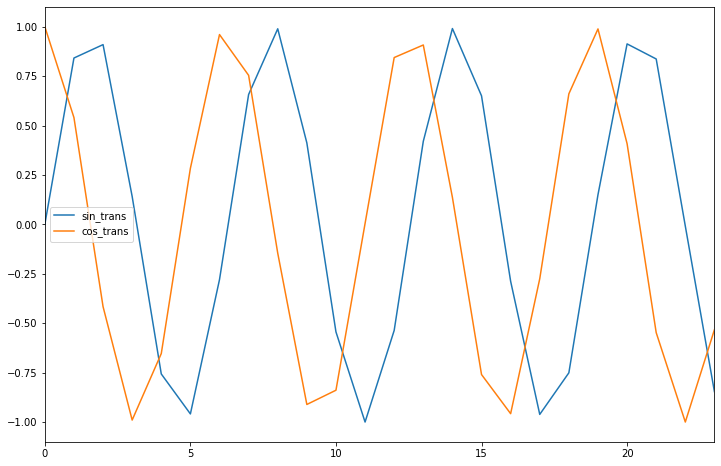

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8) 
df[["sin_trans","cos_trans"]].plot()
plt.show()

# Frequency Encoding Technique : 
### It is a technique  for converting Categotical Variable in to Numerical Variable ,where it simply replace's categorical value of same class from the number of times it has appeared in that Categorical Variable (replace the categorical value with it's freaquency).

In [74]:
df = pd.DataFrame({"alpha" : ['a','b','b','a','b','a','a','b','a','b','c','c','d','e','d']})
y = df.copy()
y

,alpha
0,a
1,b
2,b
3,a
4,b
5,a
6,a
7,b
8,a
9,b


In [75]:
x = dict(df.groupby("alpha")["alpha"].count())
df["Frequency_encode"] =  df["alpha"].map(x)

In [76]:
print(y.alpha.value_counts())

a    5
b    5
d    2
c    2
e    1
Name: alpha, dtype: int64


In [77]:
df

,alpha,Frequency_encode
0,a,5
1,b,5
2,b,5
3,a,5
4,b,5
5,a,5
6,a,5
7,b,5
8,a,5
9,b,5
